In [1]:
# requests = 브라우저의 역할을 대신해줌.
## 사이트의 요청과 응답정보를 처리
import requests as req

In [3]:
#1. 네이버 url을 통해서 사이트 요청
res = req.get('http://www.naver.com')
# <Response [200]> = 통신에 성공했습니다.
# 응답을 하게되면 응답받은 객체 전체를 반환해줌 
# HTML 코드만 있는 게 아님

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
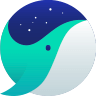
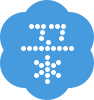

In [5]:
# 2. 응답 받는 페이지에서 원하는 정보를 추출 
res.text #HTML 코드만 가져와줘
# HTML 코드를 문자열로 가져옴

In [ ]:
#3. 가지고온 문자열을 HTML 코드로 변경
# 컴퓨터가 이해할 수 있게 언어를 변경

### BeautifulSoup

In [6]:
from bs4 import BeautifulSoup as bs

In [9]:
# bs야 문자열을 html코드로 바꿔주시오
soup = bs(res.text, "lxml")

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/banner/details/security/?=main&amp;wpid=RydDy7"></a>,
 <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybi
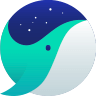
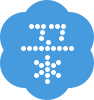

In [11]:
# a태그를 가지고 있는 값 전부 다 가져와줘
soup.select('a')
# 선택자, 태그를 사용해서 더 자세하게 적어줘야 함

In [13]:
#  #: id, . : class
data = soup.select('a.nav')
# 아직은 완벽한 테이터는 아님
# 리스트로 값이 들어와 있음

In [15]:
data[0].text

'메일'

In [17]:
for i in data:
    print(i.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


In [ ]:
# 김연아를 검색하고 뉴스ㅡ제목 크롤링해오기 

In [21]:
res1 = req.get('https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EA%B9%80%EC%97%B0%EC%95%84')
res1

<Response [200]>

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="김연아 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'김연아\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'김연아\'의 네이버 뉴스검색 결과입니다."> <title>김연아 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220714.css"> <link rel="stylesheet" type="text/css" href
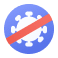
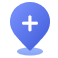
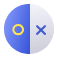
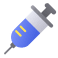

In [22]:
res1.text

In [23]:
soup1=bs(res1.text,'lxml')

In [27]:
data1 = soup1.select('a.news_tit')
data1

[<a class="news_tit" href="https://news.sbs.co.kr/news/endPage.do?news_id=N1006835078&amp;plink=ORI&amp;cooper=NAVER" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=8800011C_000000000000000000988185&amp;g=055.0000988185&amp;u='+urlencode(this.href));" target="_blank" title="[속보] 피겨퀸 김연아, 10월 결혼…성악가 고우림과 웨딩마치">[속보] 피겨퀸 <mark>김연아</mark>, 10월 결혼…성악가 고우림과 웨딩마치</a>,
 <a class="news_tit" href="http://news.tf.co.kr/read/entertain/1953912.htm" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=6&amp;i=881999s8_000000000000000000162759&amp;g=629.0000162759&amp;u='+urlencode(this.href));" target="_blank" title="[단독] '피겨여왕' 김연아 ♥ '팬텀싱어' 고우림, 결혼 전제 '열애'">[단독] '피겨여왕' <mark>김연아</mark> ♥ '팬텀싱어' 고우림, 결혼 전제 '열애'</a>,
 <a class="news_tit" href="http://www.fnnews.com/news/202207251054141630" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=11&amp;i=880000FF_000000000000000004872396&amp;g=014.0004872396&amp;u='+urlencode(this.href));" target="_blank" title="김연아, 5살 연하 고우림과 결혼...3년 열애"><mark>

In [29]:
for i in data1:
    print(i.text)

[속보] 피겨퀸 김연아, 10월 결혼…성악가 고우림과 웨딩마치
[단독] '피겨여왕' 김연아 ♥ '팬텀싱어' 고우림, 결혼 전제 '열애'
김연아, 5살 연하 고우림과 결혼...3년 열애
김연아, 포레스텔라 멤버 고우림 결혼
고우림 측 "김연아와 3년 열애...10월 결혼" (공식입장)
[속보] 피겨퀸 김연아, 10월 결혼…성악가 고우림과 웨딩마치
김연아♥포레스텔라 고우림 열애설-10월 결혼설 “확인 중” [공식]
고우림♥김연아 결혼···피겨여왕, 사랑 찾았다[공식]
'피겨 여왕' 김연아, 고우림과 10월 결혼
김연아 결혼 전제 열애… ♥5세 연하 고우림 누구?
